## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [96]:
# Your code here - remember to use markdown cells for comments as well!

In [97]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# imports the sqlite3 module to handle SQLite databases.
import sqlite3
import pandas as pd

# Connects to the SQLite database
conn = sqlite3.connect(r"C:\Users\lenovo\Downloads\im.db\im.db")
c = conn.cursor()


In [99]:
# Get the names of all the tables in the database
tables = pd.read_sql_query("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table';
                     """, conn)
print(tables)


            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


We can see all the 7 Tables present in the dataset, BUT we are only going to make use of 2 Tables ie; 
1. movie_basics
2. movie_ratings 
 

Next step is to undertake Data explortion and Data Cleaning of the 2 Tables

# DATA EXPLORATION AND DATA CLEANING

## Movie_basics Data

In [100]:
# Load the 'movie_basics' table into a DataFrame
movie_basics = pd.read_sql_query("""
                                SELECT *  
                                FROM movie_basics ;
                                 """, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [101]:
#check the shape(rows and columns)
movie_basics.shape

(146144, 6)

In [102]:
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [103]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [104]:
# check for null values/missing values in the DataFrame
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [105]:
# Drop rows with any missing values in the specific columns
movie_basics.dropna(subset=["original_title", "runtime_minutes", "genres"], inplace=True)

# Confirm that the rows with missing values have been dropped
movie_basics.isnull().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [106]:
# check for duplicates in the DataFrame
movie_basics.duplicated().sum()

0

In [107]:
# standardize the column names (to lower case and removes any whitesapces)
movie_basics.columns = movie_basics.columns.str.lower().str.strip()

In [108]:
movie_basics 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


## Movie_ratings data

In [109]:

# Load the 'movie_ratings' table into a DataFrame
movie_ratings = pd.read_sql_query("""
                                  SELECT * 
                                  FROM movie_ratings ;
                                  """, conn)
print(movie_ratings)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [110]:
movie_ratings.shape

(73856, 3)

In [111]:
movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [112]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [113]:
# check for null values/missing values in the DataFrame
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [114]:
# check for duplicates in the DataFrame
movie_ratings.duplicated().sum()

0

In [115]:
# standardize the column names (to lower case and removes any whitespaces)
movie_ratings.columns = movie_ratings.columns.str.lower().str.strip()

In [116]:
# Convert 'averagerating' and 'numvotes' columns to numeric, coercing errors to NaN
movie_ratings["averagerating"] = pd.to_numeric(movie_ratings["averagerating"], errors = "coerce")
movie_ratings["numvotes"] = pd.to_numeric(movie_ratings["numvotes"], errors = "coerce")

In [117]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


We have cleaned both the movie_basics and movie_ratings
Next step is to merge them using an SQL Qeury

### Merging of the movie_basics and movie_ratings table

In [118]:
# Lets merge the "movie_basics" and "movie_ratings" DataFrames on the "movie_id" column
merged_df =  """
                SELECT *
                FROM movie_basics AS mb
                JOIN movie_ratings AS mr
                ON mb.movie_id = mr.movie_id ;
             """

In [119]:
merged_df = pd.read_sql_query(merged_df, conn)

In [120]:
merged_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt0146592,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt0154039,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt0159369,7.6,53


In [121]:
merged_df.shape

(73856, 9)

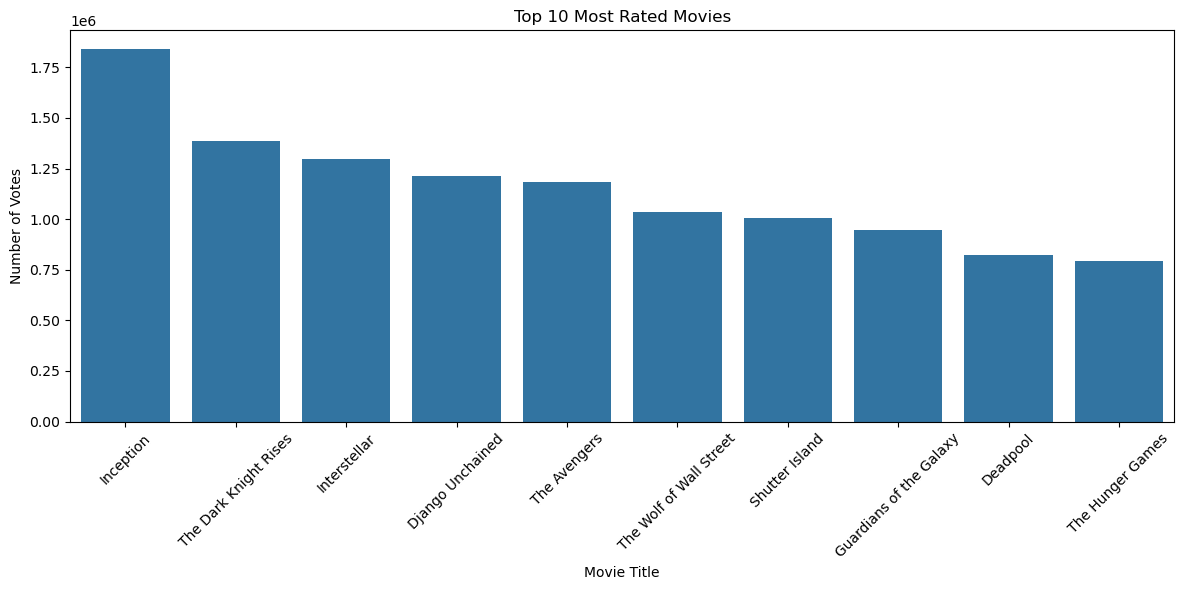

In [ ]:
# Visualization of the top 10 most rated movies by the number of votes
top_rated = merged_df.sort_values(by="numvotes", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="primary_title", y="numvotes", data=top_rated)
plt.xticks(rotation=45)
plt.title("Top 10 Most Rated Movies")
plt.ylabel("Number of Votes")
plt.xlabel("Movie Title")
plt.tight_layout()
plt.show()



Observation : The movies that generate the most audience engagement and votes are critically acclaimed, high-concept films that spark significant discussion and cultural buzz.


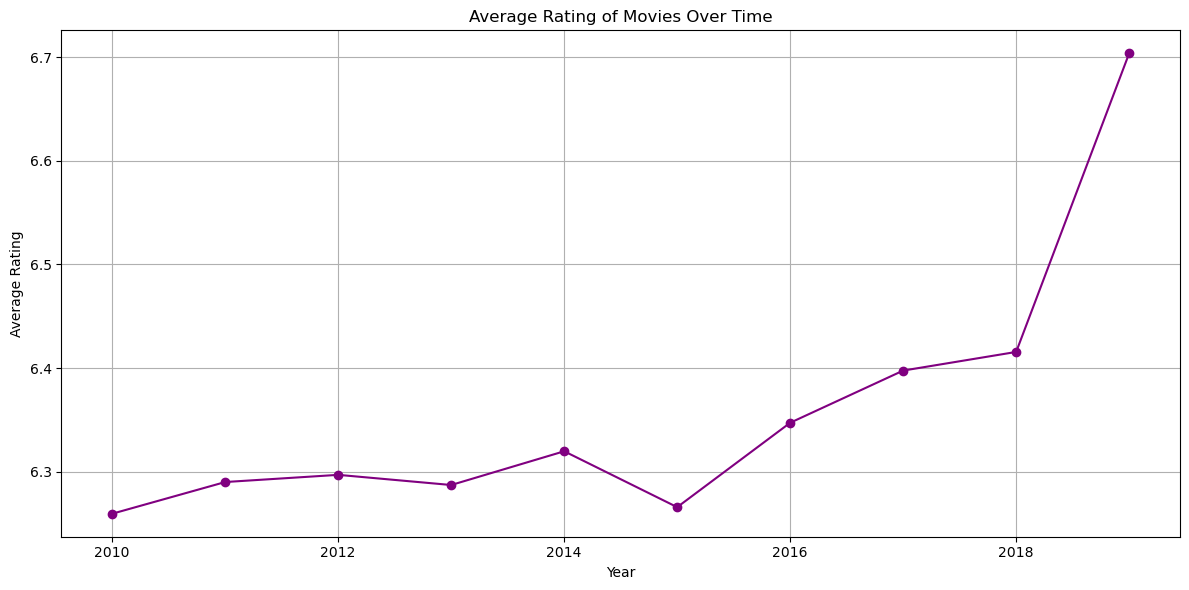

In [154]:
yearly_avg_rating = (
    merged_df.dropna(subset=["start_year", "averagerating"])
    .groupby("start_year")["averagerating"]
    .mean()
)

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, marker="o", color="purple")
plt.title("Average Rating of Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()



Observation : The average quality and critical/audience ratings of movies have been on a clear and steady upward trend over the last decade.



## THE NUMBERS DATASET

In [122]:
numbers = pd.read_csv(r"C:\Users\lenovo\DATA SCIENCE-PHASE-2-PROJECT\ds-phase-2-project-v3\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [123]:
# review the dataset(rows and columns)
numbers.shape

(5782, 6)

In [124]:
# review the dataset
numbers.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [125]:
# check for null values/missing values in the DataFrame
numbers.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [126]:
# Check for duplicates in the DataFrame
numbers.duplicated().sum()

0

In [127]:
# convert 'release_date' column to datetime format
numbers["release_date"] = pd.to_datetime(numbers["release_date"])


In [128]:
# Let's change the datatypes of the specified columns to float datatype
money_cols = ["production_budget", "domestic_gross", "worldwide_gross"]
# Convert to string in case the values are mixed datatypes
for col in money_cols:
    numbers[col] = numbers[col].astype(str)
    
    # Remove dollar signs and commas
    numbers[col] = numbers[col].str.replace(r"[\$,]", "", regex=True)
    
    # Convert to float
    numbers[col] = pd.to_numeric(numbers[col], errors = "coerce")

## Arithmetics
Now Let us do some calculations based on this dataset


In [ ]:
# Profits per movie
# we add a new column by the name "profit"
numbers["profit"] = numbers["worldwide_gross"] - numbers["production_budget"]
numbers


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000
5778,79,1999-04-02,Following,6000,48482,240495,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400


In [ ]:
## Return on Investment (ROI) calculation
# We add a new column by the name "roi"
numbers["roi"] = numbers["profit"] / numbers["production_budget"]
numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-1.000000
5778,79,1999-04-02,Following,6000,48482,240495,234495,39.082500
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-0.732400
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-1.000000


In [ ]:
# Top 10 movies with the highest profit
numbers.sort_values("profit", ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,10.041042
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,6.993278
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,5.746382
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,5.741291
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,6.681016


In [135]:
# Top 10 movies with the highest ROI
numbers.sort_values("roi", ascending=False).head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
5745,46,1972-06-30,Deep Throat,25000,45000000,45000000,44975000,1799.000000
5613,14,1980-03-21,Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,22168808,341.058585
5346,47,1942-08-13,Bambi,858000,102797000,268000000,267142000,311.354312
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,290.704000
5676,77,1968-10-01,Night of the Living Dead,114000,12087064,30087064,29973064,262.921614
5210,11,1976-11-21,Rocky,1000000,117235147,225000000,224000000,224.000000


# VISUALIZATIONS
## The visualizations will be as aa result of mergerd data betwen the merged_df and numbers dataset

In [144]:
final_merge = pd.merge(merged_df, numbers, left_on="primary_title", right_on="movie", how="left")


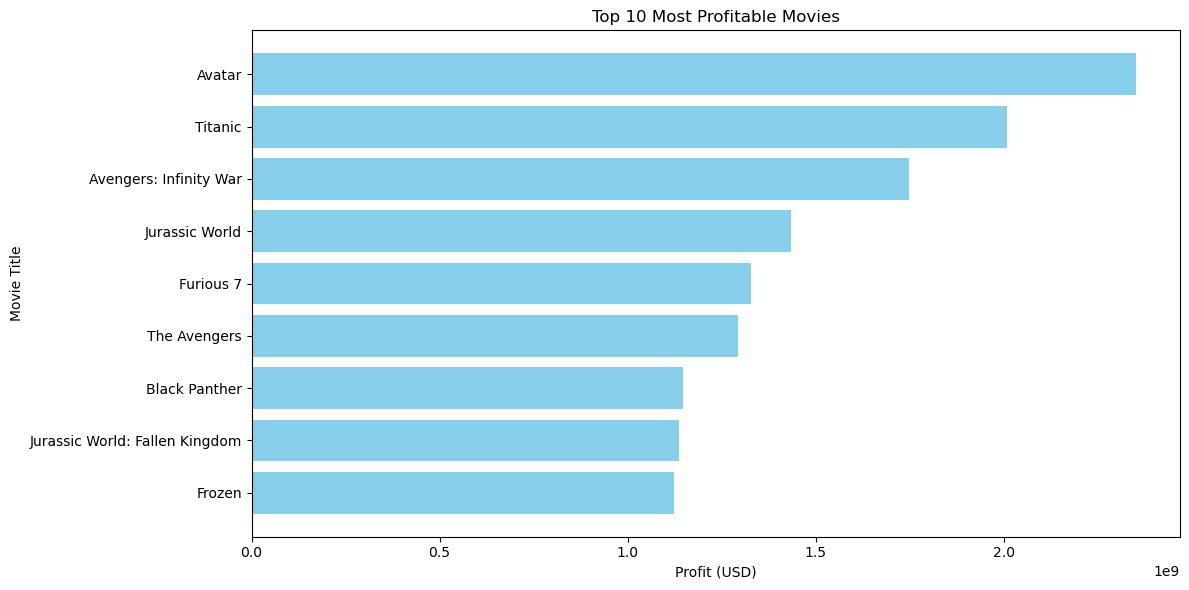

In [158]:
import matplotlib.pyplot as plt

# Sort and select top 10
top_profit = final_merge.sort_values("profit", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_profit["primary_title"], top_profit["profit"], color="skyblue")
plt.xlabel("Profit (USD)")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Profitable Movies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Observation: The most profitable films are generally high-concept, and original movies that can be turned into a long-running franchise.


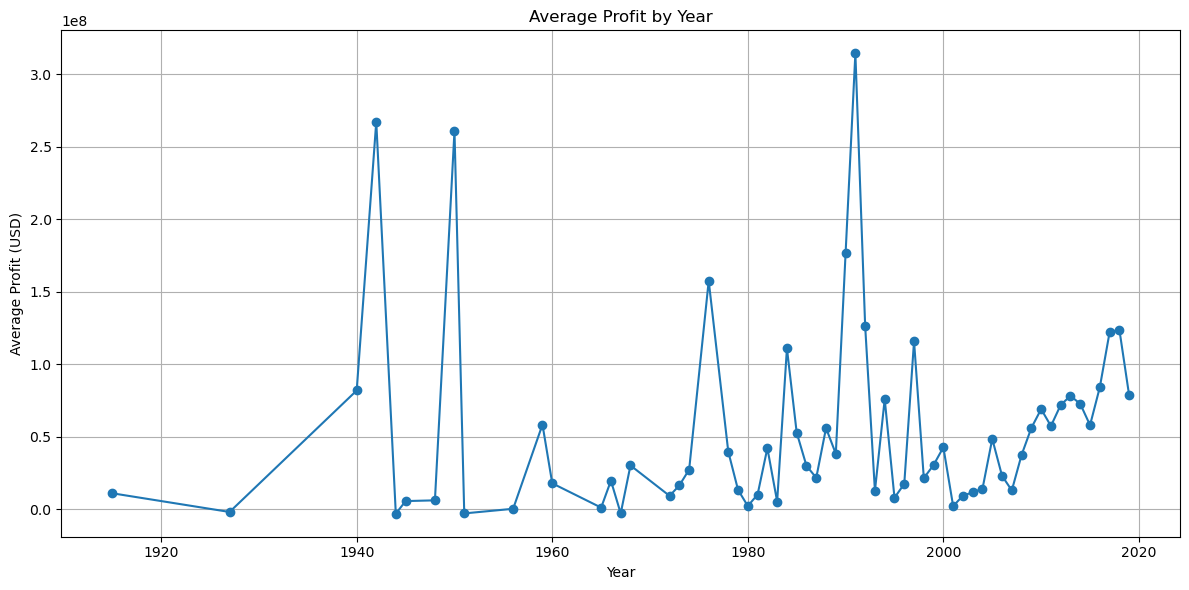

In [146]:
# Ensure release date is datetime
final_merge["release_date"] = pd.to_datetime(final_merge["release_date"])

# Group by year
profit_by_year = final_merge.groupby(final_merge["release_date"].dt.year)["profit"].mean()

plt.figure(figsize=(12, 6))
plt.plot(profit_by_year.index, profit_by_year.values, marker="o")
plt.title("Average Profit by Year")
plt.xlabel("Year")
plt.ylabel("Average Profit (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



Observation: The average profitability of movies is highly volatile and unpredictable, with profitability spikes often driven by a few massive, hit-or-miss films.



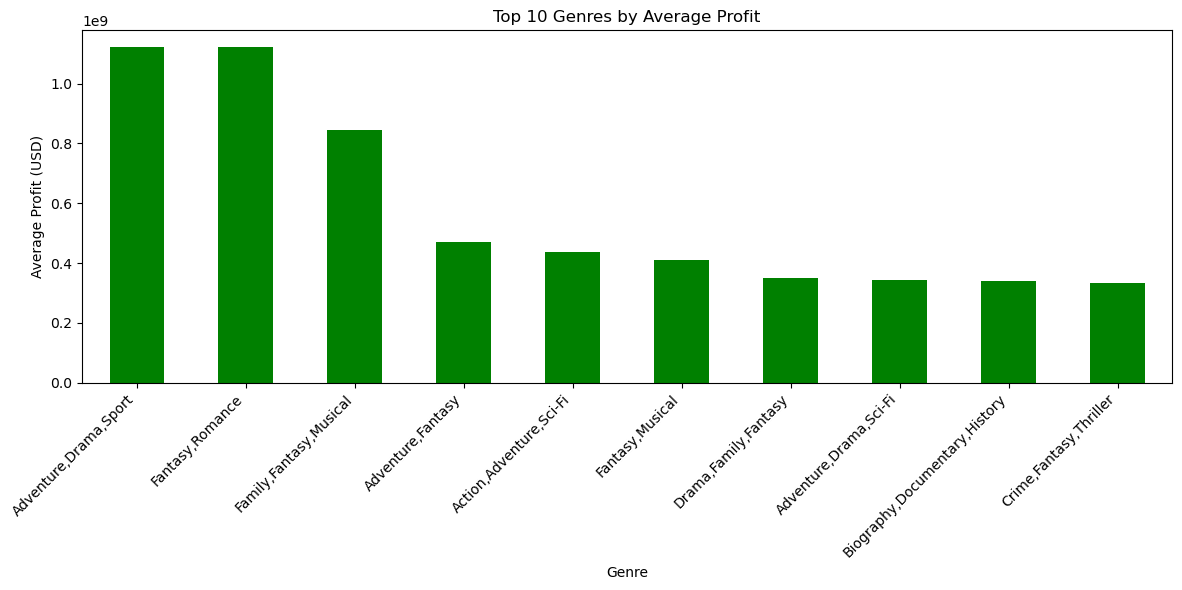

In [159]:
genre_profit = final_merge.groupby("genres")["profit"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
genre_profit.plot(kind="bar", color="green")
plt.title("Top 10 Genres by Average Profit")
plt.xlabel("Genre")
plt.ylabel("Average Profit (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Observation: The most profitable films are not defined by a single genre, but by a strategic blend of genres, with fantasy and adventure being key components of the highest-earning combinations.



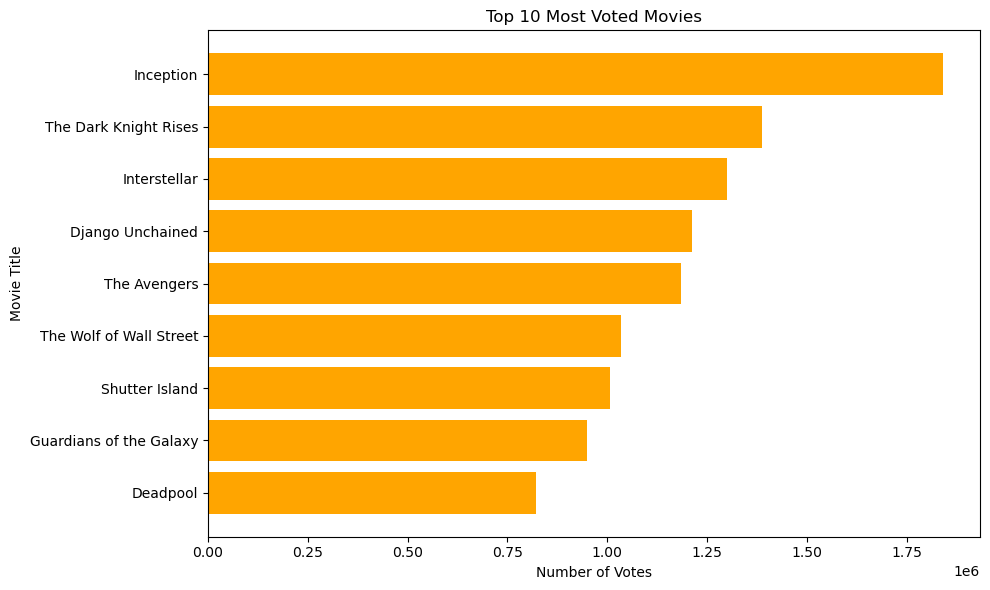

In [160]:
top_voted = final_merge[final_merge["numvotes"].notna()]
top_voted = top_voted.sort_values(by="numvotes", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_voted["primary_title"], top_voted["numvotes"], color="orange")
plt.xlabel("Number of Votes")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Voted Movies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Observation: These films had the widest audience engagement.


# business recommendations
1. Focus your studio on creating original films with the built-in potential to become the next major sci-fi or fantasy franchise.
2. Focus on creating a diversified portfolio of films,(ie a  balance of lower-budget, lower-risk projects with a few high-concept blockbusters) to lower/reduce volatility while still pursuing high-profit opportunities.
3.  Focus on producing films that combine multiple genres, specifically targeting high-profit blends such as "Adventure, Drama, Sport" or "Fantasy, Romance," to maximize your average return

## other recommendations
1. Focus on producing unique, thought-provoking films that are designed to be talked about and debated.( it helps to have a highly engaged audience.)
2. Prioritize investing in high-quality storytelling and production.(i.e films that receive strong critical and audience ratings.)

In [155]:
final_merge.to_csv("final_merge.csv", index=False)


In [156]:
import os
os.path.isfile("final_merge.csv")

True

In [157]:

os.getcwd()


'c:\\Users\\lenovo\\DATA SCIENCE-PHASE-2-PROJECT\\ds-phase-2-project-v3'